# Presentación

## Introducción

**TUIA - Aprendizaje Automático 1** - 2023

---

**Trabajo Práctico Integrador** - "Predicción de lluvia en Australia"

**Alumnos:**  

*   Brisa Menescaldi
*   Miguel Mussi



## Objetivo


Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

## Dataset



El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

## Consignas





1. Armar grupos de hasta dos personas para la realización del trabajo práctico. Dar aviso al cuerpo docente del equipo. En caso de no tener compañero, informar al cuerpo docente.


2. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.
Debe incluir:

> * Análisis y decisión sobre datos faltantes
* Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
* ¿Está balanceado el dataset?
* Codificación de variables categóricas (si se van a utilizar para predicción).
* Matriz de correlación
* Selección de características para la predicción.
* Estandarización de datos.


3. Implementar la solución del problema de regresión con regresión lineal múltiple.

> * Probar con el método LinearRegression.
* Probar con métodos de gradiente descendiente.
* Probar con métodos de regularización (Lasso, Ridge, Elasticnet).
* Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE).


4. Implementar la solución del problema de clasificación con regresión logística.

> * Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, ROC-AUC, entre otras).


5. Implementar las soluciones con una red neuronal.

> * Obtener las métricas adecuadas.


6. Mejorar la selección de hiperparámetros.

> * Probar validación cruzada.


7. MLOps (a definir).


8. Escribir una conclusión del trabajo

# Desarrollo

## Análisis exploratorio

In [1]:
#@title Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, auc


In [2]:
#@title Sincronización con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title DataFrame

# Path 1 - Referenciado a la carpeta de Drive
file_path= '/content/drive/MyDrive/UNR/4 - Aprendizaje Automático (IA41)/Trabajo Práctico (AA1)/weatherAUS.csv'
df_original = pd.read_csv(file_path, sep=',', engine='python')

# Path 2 - Mismo directorio
#df_original = pd.read_csv('weatherAUS.csv', sep=',', engine='python')

In [4]:
df_original

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [6]:
df_original.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [7]:
df_original.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


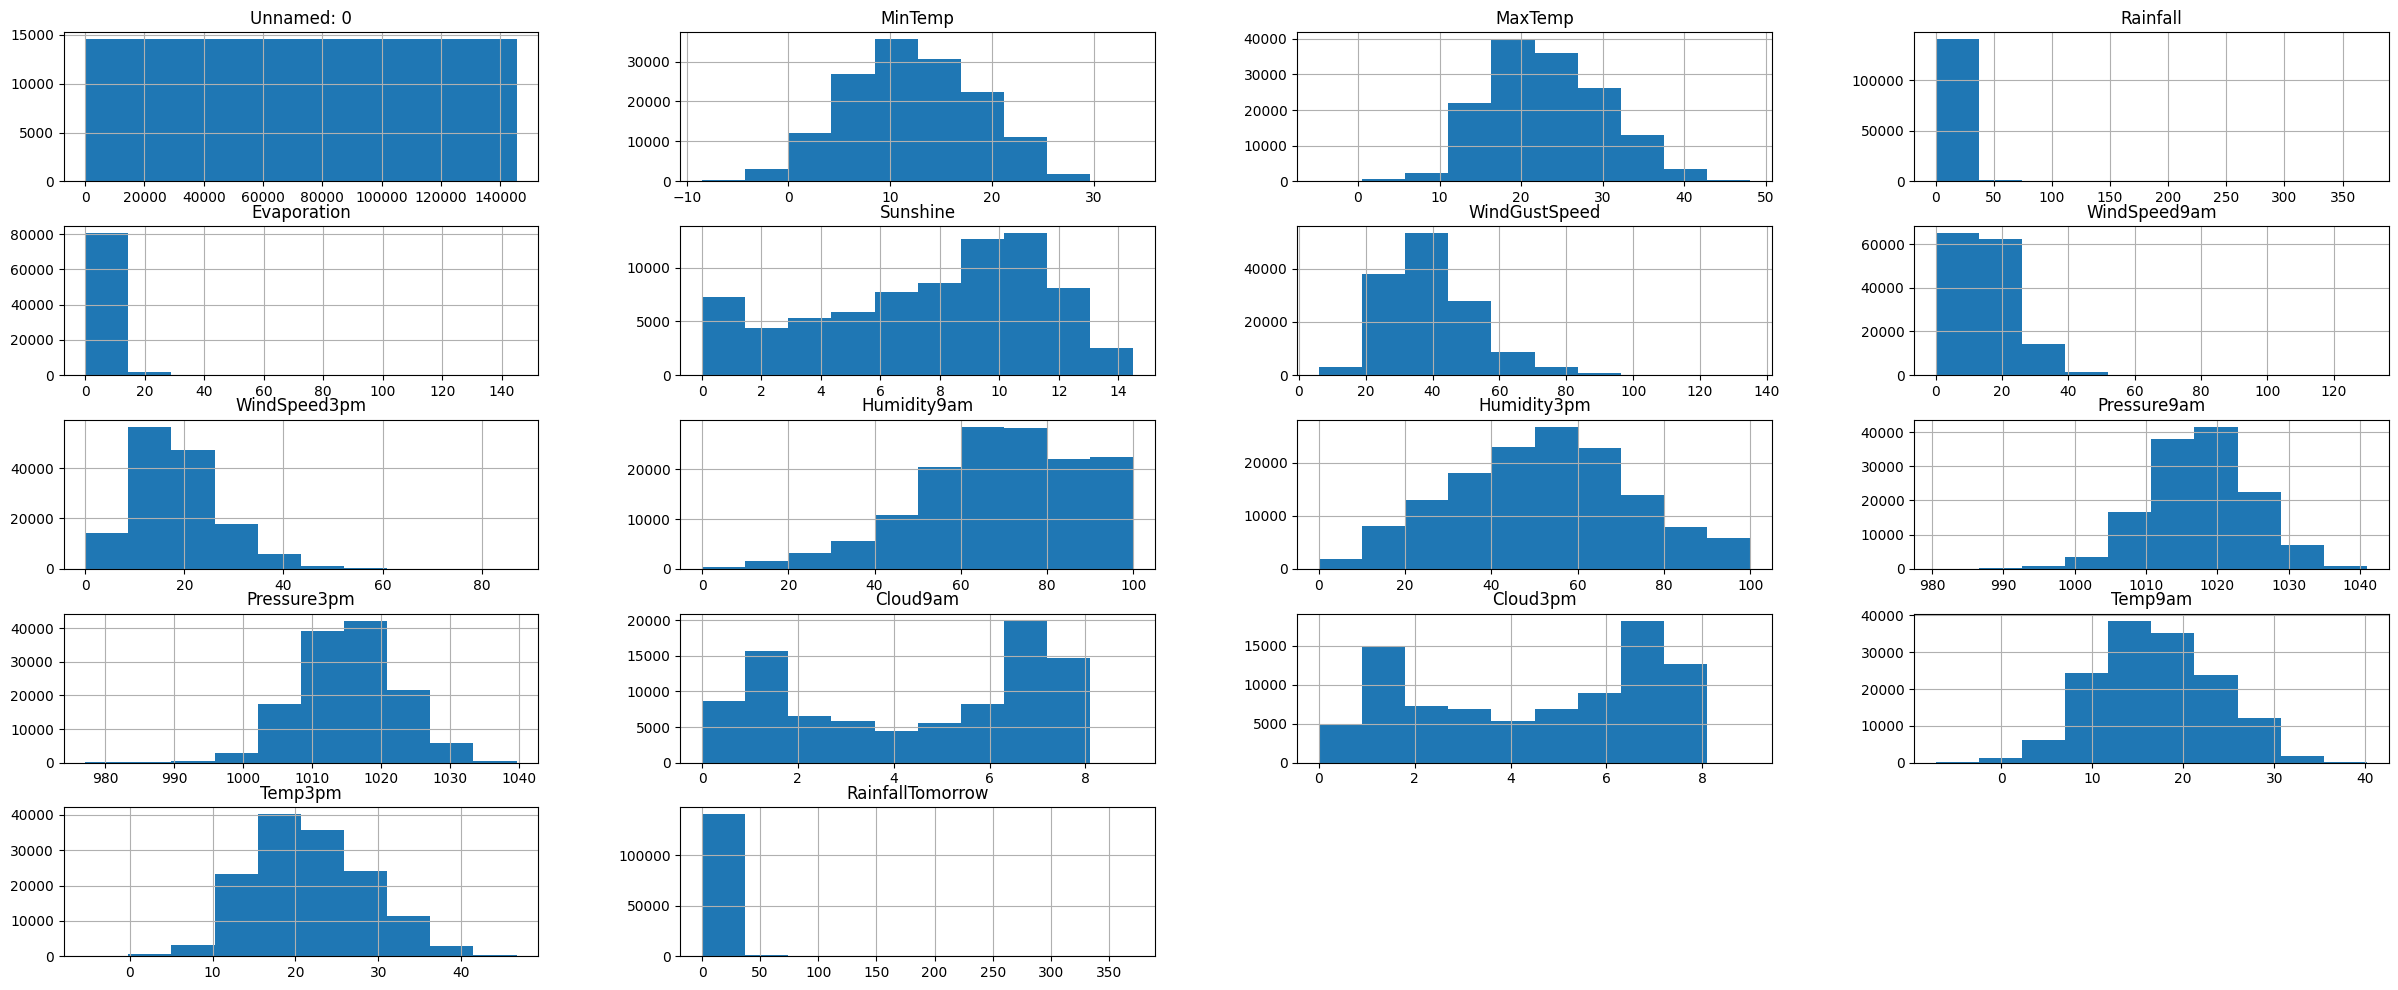

In [8]:
df_original.hist(figsize=(30,12))
plt.show()

In [9]:
# Datos temporales
df_original['Date'] = pd.to_datetime(df_original['Date'])
# Establece 'Date' como el índice del DataFrame (si aún no lo está)
df_original.set_index('Date', inplace=True)

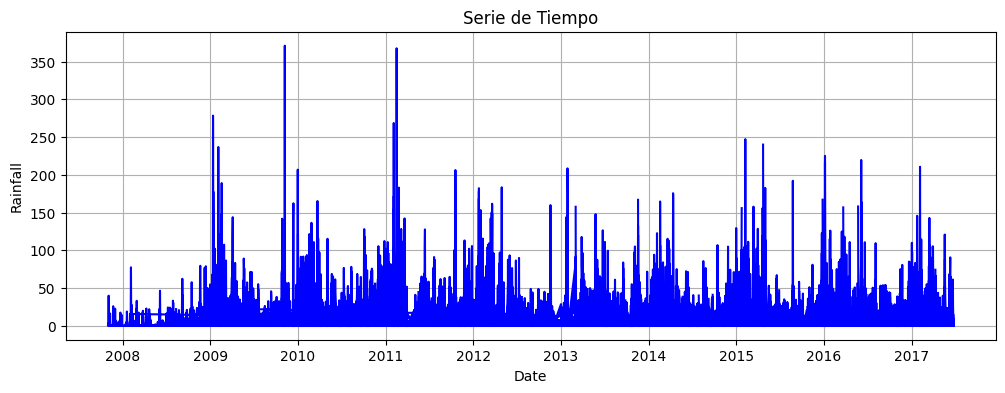

In [10]:
# Serie de Tiempo - Análisis de comportamientos estacionales
plt.figure(figsize=(12, 4))
plt.plot(df_original.index, df_original['Rainfall'], label='Serie de Tiempo', color='b')
plt.title('Serie de Tiempo')
plt.xlabel('Date')
plt.ylabel('Rainfall')
#plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Eliminación de la primera columa (Unnamed)
df_original = df_original.drop(['Unnamed: 0'], axis=1)

In [12]:
# Eliminación de la columa fecha
# Restablece el índice para convertir "Date" nuevamente en una columna
df_original.reset_index(inplace=True)
df_original = df_original.drop(['Date'], axis=1)

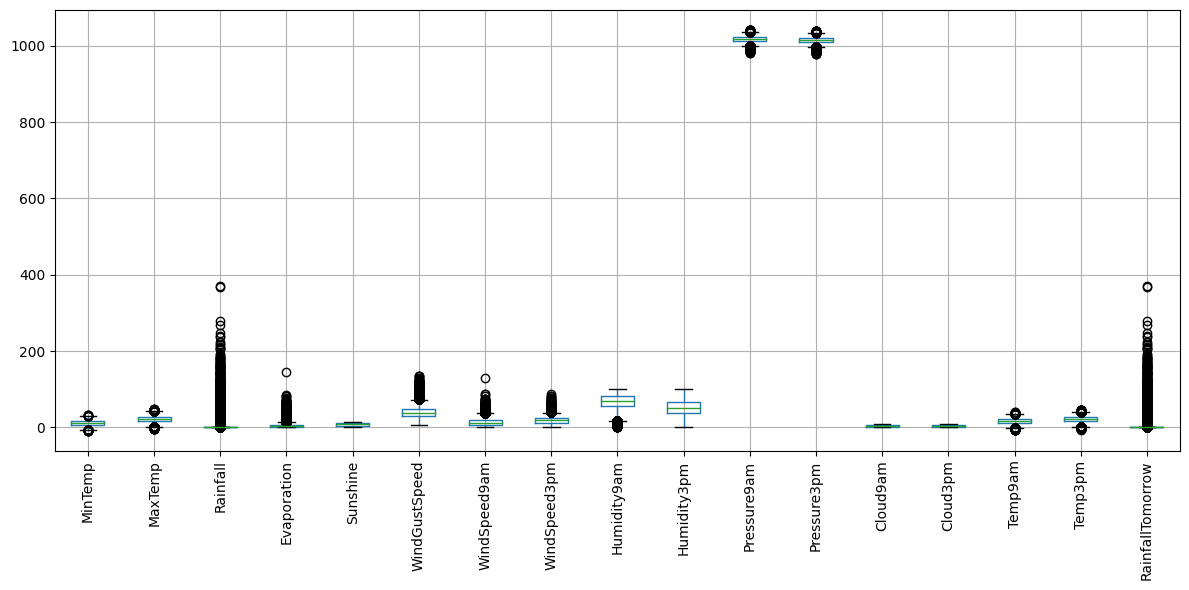

In [13]:
# Boxplot de los atributos a modo exploratorio
plt.figure(figsize=(12, 6))
df_original.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

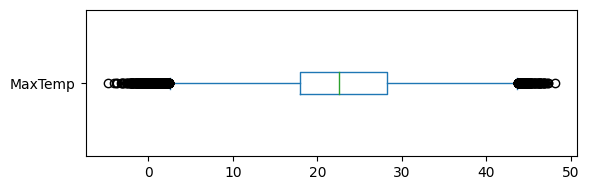

In [14]:
# Boxplot por atributo individual
# Para ver de más cerca las columnas con menos rango
target = 'MaxTemp'
plt.figure(figsize=(6, 2))
df_original[target].plot(kind='box', vert=False)
plt.tight_layout()
plt.show()

## Limpieza del Dataset

Se desea analizar únicamente los registros correspondientes a las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

### Filtrado de ciudades

In [15]:
# Copia del DF original con los registros correspondientes a la costa sureste
ciudades_a_conservar = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']
df = df_original[df_original['Location'].isin(ciudades_a_conservar)].copy()

In [16]:
df['Location'] = df['Location'].astype('category')
df['RainToday'] = df['RainToday'].astype('category')
df['RainTomorrow'] = df['RainTomorrow'].astype('category')

In [17]:
# Agrupar por etiqueta y contar la frecuencia
Location_frec = df['Location'].value_counts()
Location_frec

Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: Location, dtype: int64

### Tratamiento de datos nulos y faltantes

-- Opción A: Reemplazo por la media. Listado manual (NO USADA)

In [ ]:
# Eliminación de registros con datos nulos/faltantes en variables booleanas
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Se reemplaza valores nulos por las medias de cada columna que los contiene
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(), inplace=True) # No quedan nulos acá
df['Evaporation'].fillna(value=df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(value=df['Sunshine'].mean(), inplace=True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(), inplace=True)


-- Opción B: Reemplazo por la mediana. Listado iterativo

In [18]:
# Eliminación de registros con datos nulos/faltantes en variables booleanas
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [19]:
# Lista de variables numéricas
t = (df.dtypes == "float64")
num_cols = list(t[t].index)
# Se reemplaza valores nulos por las medianas de cada columna que los contiene
for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

### Recategorización de variables

In [20]:
# Reemplazo de Yes/No
df['RainToday'] = df['RainToday'].replace('Yes',1)
df['RainToday'] = df['RainToday'].replace('No',0)
df['RainTomorrow'] = df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow'] = df['RainTomorrow'].replace('No',0)
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

# Reemplazo de Coordenadas
mapeo_coord = {
    'E': 0, 'N': 90, 'W': 180, 'S': 270,
    'NNE': 45, 'ENE': 22.5, 'ESE': 337.5, 'SSE': 292.5,
    'SSO': 247.5, 'OSO': 202.5, 'ONO': 112.5, 'NNO': 67.5}
df['WindGustDir'] = df['WindGustDir'].map(mapeo_coord)
df['WindDir9am'] = df['WindDir9am'].map(mapeo_coord)
df['WindDir3pm'] = df['WindDir3pm'].map(mapeo_coord)
df.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm'], inplace=True)

### Reseteo de los índices del DF

In [21]:
# Reseteo de índices del dataframe
df = df.copy().reset_index(drop=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,Sydney,13.8,19.5,0.0,4.6,9.5,337.5,35.0,45.0,337.5,...,56.0,1018.5,1016.3,6.0,1.0,16.5,19.1,0,0,0.0
1,Sydney,16.7,23.9,0.4,7.0,2.8,45.0,39.0,180.0,22.5,...,64.0,1018.5,1016.3,7.0,5.0,17.8,22.9,0,1,2.0
2,Sydney,9.9,24.0,0.0,6.6,12.1,180.0,41.0,180.0,292.5,...,30.0,1012.9,1011.3,6.0,6.0,14.7,23.3,0,0,0.0
3,Sydney,14.0,19.0,3.8,6.4,0.8,292.5,37.0,292.5,292.5,...,53.0,1018.5,1026.2,8.0,7.0,14.7,17.1,1,0,0.2
4,Sydney,12.9,20.3,0.2,3.0,10.9,22.5,37.0,180.0,0.0,...,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,Melbourne,11.9,17.8,0.0,1.4,4.1,90.0,54.0,90.0,90.0,...,63.0,1017.5,1012.0,7.0,7.0,13.9,17.2,0,1,6.8
3122,Melbourne,7.7,19.0,0.0,2.2,2.2,90.0,20.0,45.0,90.0,...,53.0,1027.7,1024.8,7.0,6.0,9.8,17.4,0,0,0.0
3123,Melbourne,6.6,17.1,0.0,1.0,4.8,45.0,15.0,45.0,270.0,...,65.0,1026.4,1023.8,5.0,3.0,8.4,15.9,0,0,0.0
3124,Melbourne,6.4,15.8,0.0,2.4,8.8,90.0,39.0,45.0,90.0,...,56.0,1028.1,1024.5,1.0,7.0,7.9,15.6,0,0,0.6


### Comprobaciones finales y verificaciones

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,Sydney,13.8,19.5,0.0,4.6,9.5,337.5,35.0,45.0,337.5,...,56.0,1018.5,1016.3,6.0,1.0,16.5,19.1,0,0,0.0
1,Sydney,16.7,23.9,0.4,7.0,2.8,45.0,39.0,180.0,22.5,...,64.0,1018.5,1016.3,7.0,5.0,17.8,22.9,0,1,2.0
2,Sydney,9.9,24.0,0.0,6.6,12.1,180.0,41.0,180.0,292.5,...,30.0,1012.9,1011.3,6.0,6.0,14.7,23.3,0,0,0.0
3,Sydney,14.0,19.0,3.8,6.4,0.8,292.5,37.0,292.5,292.5,...,53.0,1018.5,1026.2,8.0,7.0,14.7,17.1,1,0,0.2
4,Sydney,12.9,20.3,0.2,3.0,10.9,22.5,37.0,180.0,0.0,...,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,0,0,0.0


In [23]:
df.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,...,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000
mean,12.254766,22.111356,1.945489,5.039923,6.795553,148.826775,46.368202,158.845969,151.842610,20.328855,...,52.064619,1019.068618,1016.589635,5.067818,5.048944,16.030294,20.593250,0.197697,0.222009,2.314075
std,5.618470,6.035873,6.965085,3.214767,3.818733,108.479312,15.929919,100.389192,118.338446,12.143014,...,16.912622,7.074739,7.137190,2.533843,2.418298,5.465777,5.742227,0.398326,0.415664,7.882799
min,-6.800000,8.400000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,2.000000,...,8.000000,991.700000,985.500000,0.000000,0.000000,1.600000,7.700000,0.000000,0.000000,0.000000
25%,8.125000,17.600000,0.000000,2.600000,3.800000,90.000000,35.000000,90.000000,45.000000,11.000000,...,41.000000,1014.525000,1012.000000,3.000000,3.000000,11.900000,16.300000,0.000000,0.000000,0.000000
50%,12.200000,21.800000,0.000000,4.200000,7.600000,90.000000,43.000000,90.000000,90.000000,17.000000,...,52.000000,1019.100000,1016.700000,6.000000,6.000000,16.000000,20.300000,0.000000,0.000000,0.000000
75%,16.600000,25.975000,0.400000,6.800000,9.800000,270.000000,57.000000,270.000000,270.000000,28.000000,...,63.000000,1023.800000,1021.500000,7.000000,7.000000,20.100000,24.400000,0.000000,0.000000,0.600000
max,30.500000,46.400000,119.400000,23.800000,13.700000,337.500000,107.000000,337.500000,337.500000,67.000000,...,99.000000,1039.300000,1037.300000,8.000000,8.000000,35.500000,44.900000,1.000000,1.000000,119.400000


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3126.0,12.254766,5.618470,-6.8,8.125,12.2,16.600,30.5
MaxTemp,3126.0,22.111356,6.035873,8.4,17.600,21.8,25.975,46.4
Rainfall,3126.0,1.945489,6.965085,0.0,0.000,0.0,0.400,119.4
Evaporation,3126.0,5.039923,3.214767,0.0,2.600,4.2,6.800,23.8
Sunshine,3126.0,6.795553,3.818733,0.0,3.800,7.6,9.800,13.7
WindGustDir,3126.0,148.826775,108.479312,0.0,90.000,90.0,270.000,337.5
WindGustSpeed,3126.0,46.368202,15.929919,11.0,35.000,43.0,57.000,107.0
WindDir9am,3126.0,158.845969,100.389192,0.0,90.000,90.0,270.000,337.5
WindDir3pm,3126.0,151.842610,118.338446,0.0,45.000,90.0,270.000,337.5
WindSpeed9am,3126.0,20.328855,12.143014,2.0,11.000,17.0,28.000,67.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Location          3126 non-null   category
 1   MinTemp           3126 non-null   float64 
 2   MaxTemp           3126 non-null   float64 
 3   Rainfall          3126 non-null   float64 
 4   Evaporation       3126 non-null   float64 
 5   Sunshine          3126 non-null   float64 
 6   WindGustDir       3126 non-null   float64 
 7   WindGustSpeed     3126 non-null   float64 
 8   WindDir9am        3126 non-null   float64 
 9   WindDir3pm        3126 non-null   float64 
 10  WindSpeed9am      3126 non-null   float64 
 11  WindSpeed3pm      3126 non-null   float64 
 12  Humidity9am       3126 non-null   float64 
 13  Humidity3pm       3126 non-null   float64 
 14  Pressure9am       3126 non-null   float64 
 15  Pressure3pm       3126 non-null   float64 
 16  Cloud9am          3126 n

# Visualizaciones

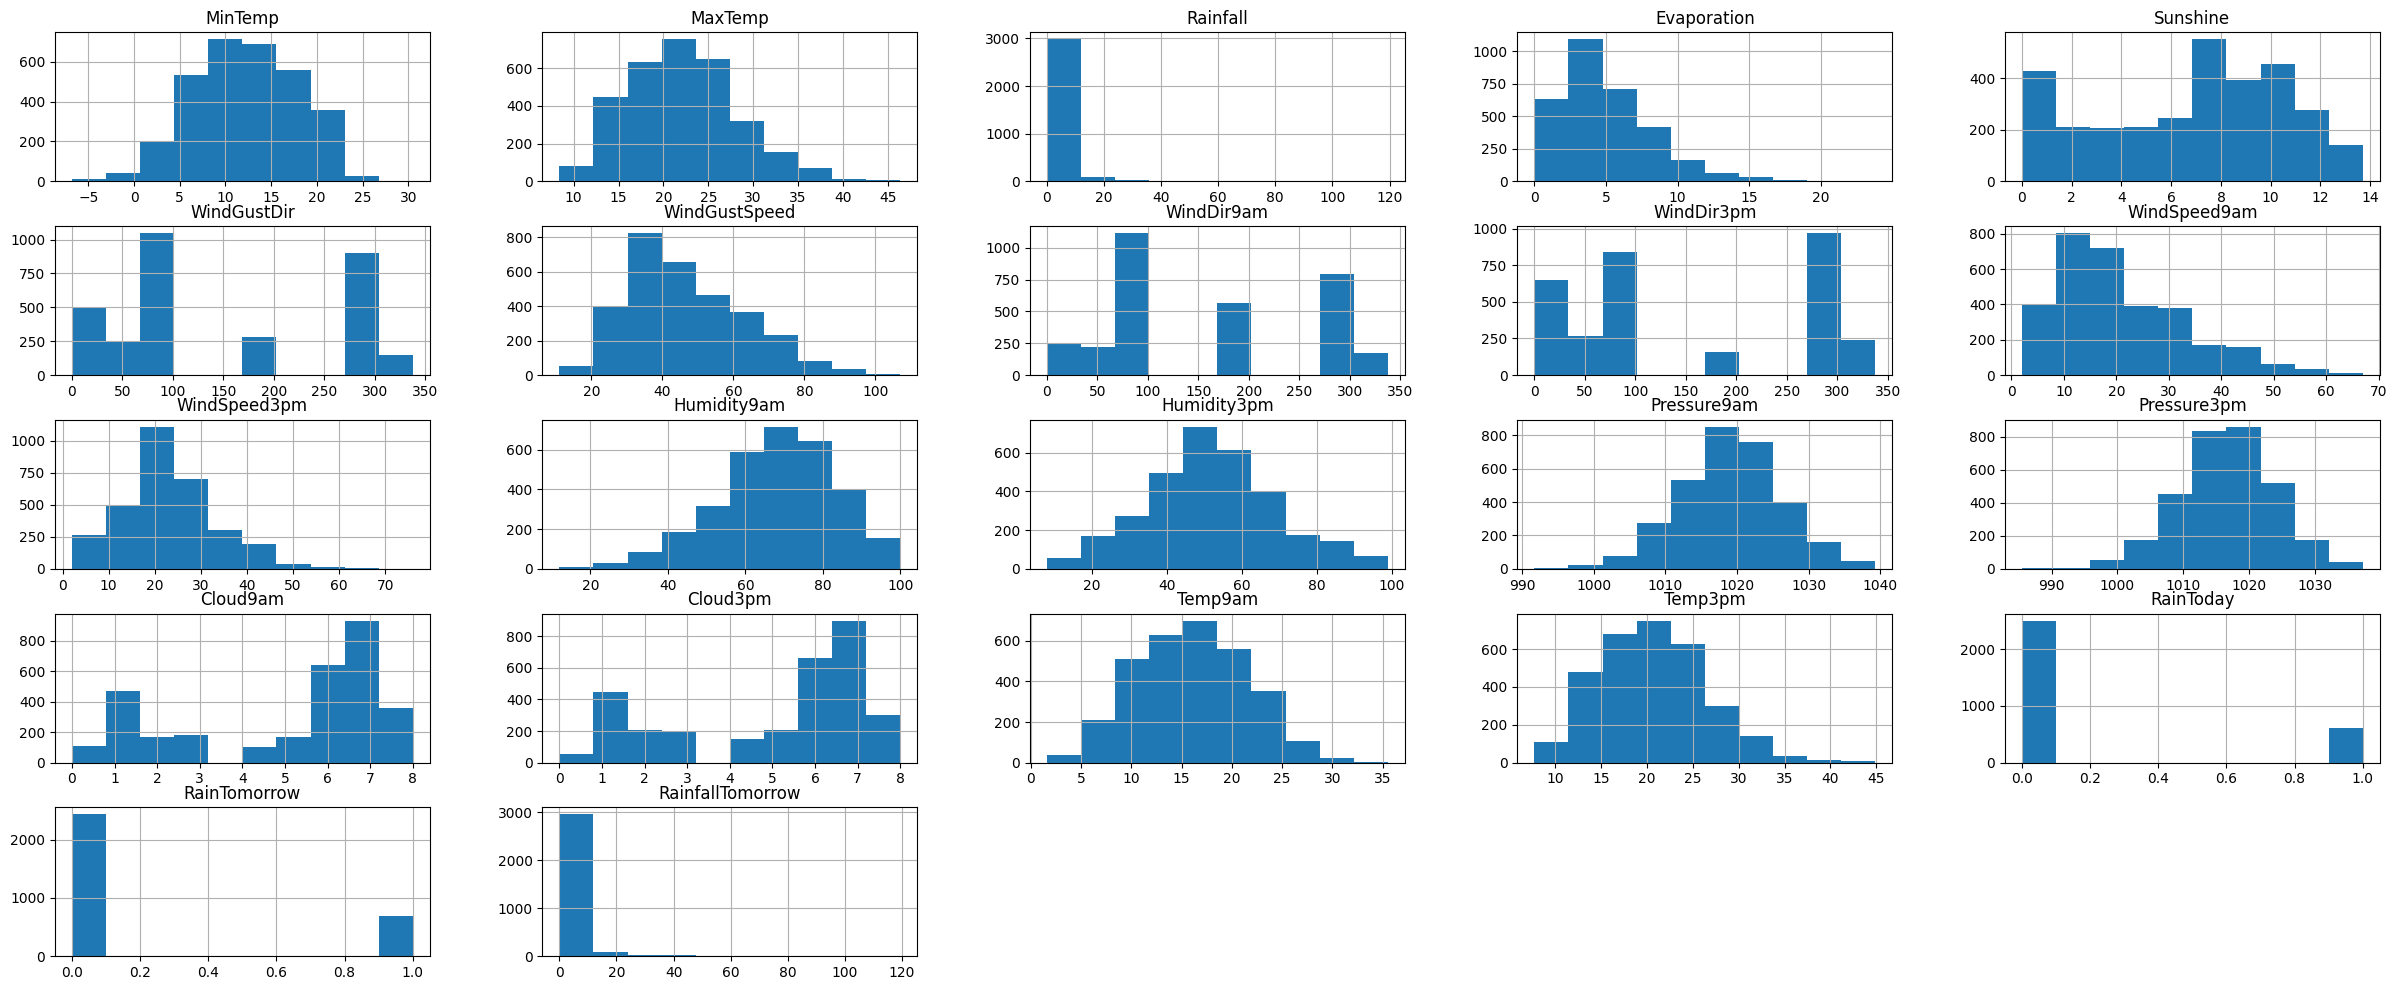

In [27]:
#@title Histogramas
df.hist(figsize=(30,12))
plt.show()

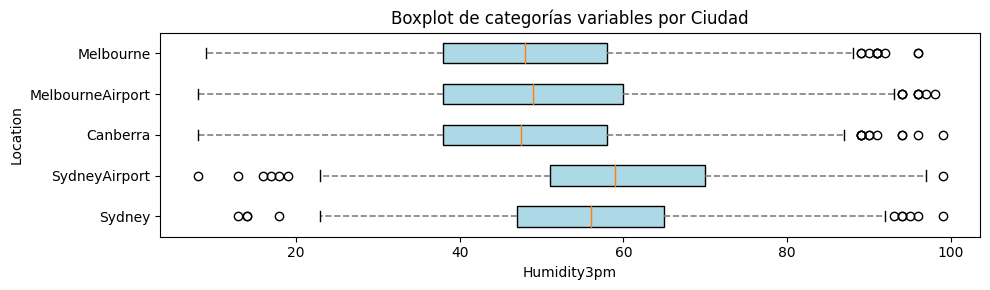

In [28]:
#@title Boxplot de atributos variables

# Variable a analizar (Disponibles)
# Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine
# WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am
# WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm
# Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, RainfallTomorrow
target = 'Humidity3pm'

# Configuración de estilo y tamaño del gráfico
plt.figure(figsize=(10, 3))

# Crear el gráfico de boxplot con barrios en el eje vertical y precios en el eje horizontal
boxplot = plt.boxplot([df[df['Location'] == location][target] for location in df['Location'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de los cuadros (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(df['Location'].unique()) + 1), df['Location'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Location')
plt.title('Boxplot de categorías variables por Ciudad')

# Desactivar notación científica en el eje horizontal
# plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

0    2432
1     694
Name: RainTomorrow, dtype: int64


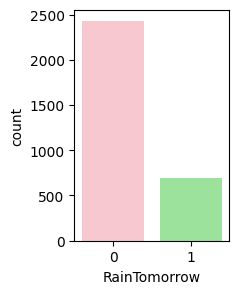

In [29]:
#@title Balance de RainTomorrow (No/Yes)
cols= ["pink","lightgreen"]
plt.figure(figsize=(2, 3))
sns.countplot(x=df["RainTomorrow"], palette= cols)
print(df['RainTomorrow'].value_counts())
plt.show()

# Correlaciones

In [30]:
corr = df.corr()
# corr

<ipython-input-30-6ccb5d3a83dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


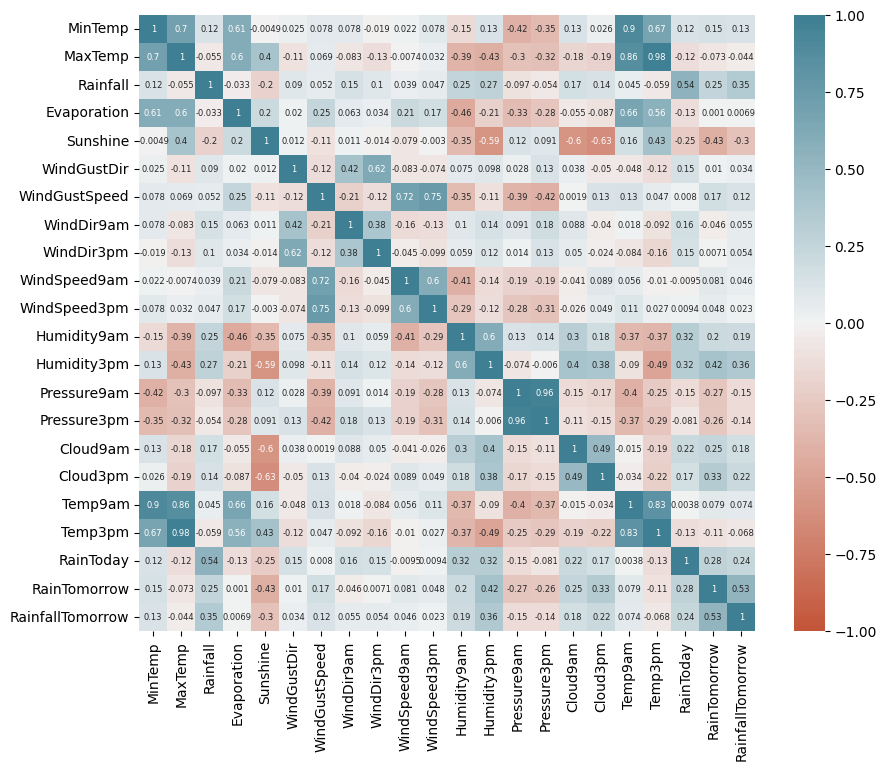

In [31]:
#@title Matriz de Correlación
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

# Estandarización

In [32]:
#@title Estandarización Z-score
df_sub = df.drop(['Location'], axis=1) # Eliminación de variables no numéricas
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df_sub) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
df_std

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0.275071,-0.432709,-0.279365,-0.136866,0.708318,1.739534,-0.713753,-1.134228,1.569119,-1.344927,...,0.232726,-0.080386,-0.040588,0.367951,-1.674563,0.085950,-0.260089,-0.496399,-0.534193,-0.293607
1,0.791309,0.296383,-0.221926,0.609808,-1.046471,-0.957264,-0.462613,0.210754,-1.093164,-1.097832,...,0.705821,-0.080386,-0.040588,0.762672,-0.020242,0.323831,0.401781,-0.496399,1.871984,-0.039850
2,-0.419179,0.312953,-0.279365,0.485362,1.389281,0.287412,-0.337043,0.210754,1.188793,0.302374,...,-1.304833,-0.872061,-0.741256,0.367951,0.393338,-0.243425,0.471452,-0.496399,-0.534193,-0.293607
3,0.310674,-0.515560,0.266301,0.423139,-1.570288,1.324642,-0.588183,1.331572,1.188793,-0.274181,...,0.055316,-0.080386,1.346735,1.157393,0.806918,-0.243425,-0.608442,2.014510,-0.534193,-0.268231
4,0.114860,-0.300146,-0.250646,-0.634649,1.074991,-1.164710,-0.588183,0.210754,-1.283327,-0.768372,...,0.291863,1.375731,1.262655,-0.816211,-1.674563,0.159144,-0.138165,-0.496399,-0.534193,-0.293607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,-0.063153,-0.714403,-0.279365,-1.132432,-0.705989,-0.542372,0.479162,-0.685900,-0.522675,-0.027086,...,0.646684,-0.221756,-0.643162,0.762672,0.806918,-0.389814,-0.591024,-0.496399,1.871984,0.569169
3122,-0.810807,-0.515560,-0.279365,-0.883541,-1.203616,-0.542372,-1.655528,-1.134228,-0.522675,-0.933102,...,0.055316,1.220223,1.150548,0.762672,0.393338,-1.140056,-0.556189,-0.496399,-0.534193,-0.293607
3123,-1.006621,-0.830395,-0.279365,-1.256878,-0.522653,-0.957264,-1.969453,-1.134228,0.998630,-0.933102,...,0.764958,1.036442,1.010414,-0.026769,-0.847403,-1.396236,-0.817453,-0.496399,-0.534193,-0.293607
3124,-1.042224,-1.045808,-0.279365,-0.821318,0.524982,-0.542372,-0.462613,-1.134228,-0.522675,-0.768372,...,0.232726,1.276772,1.108508,-1.605652,0.806918,-1.487729,-0.869706,-0.496399,-0.534193,-0.217480


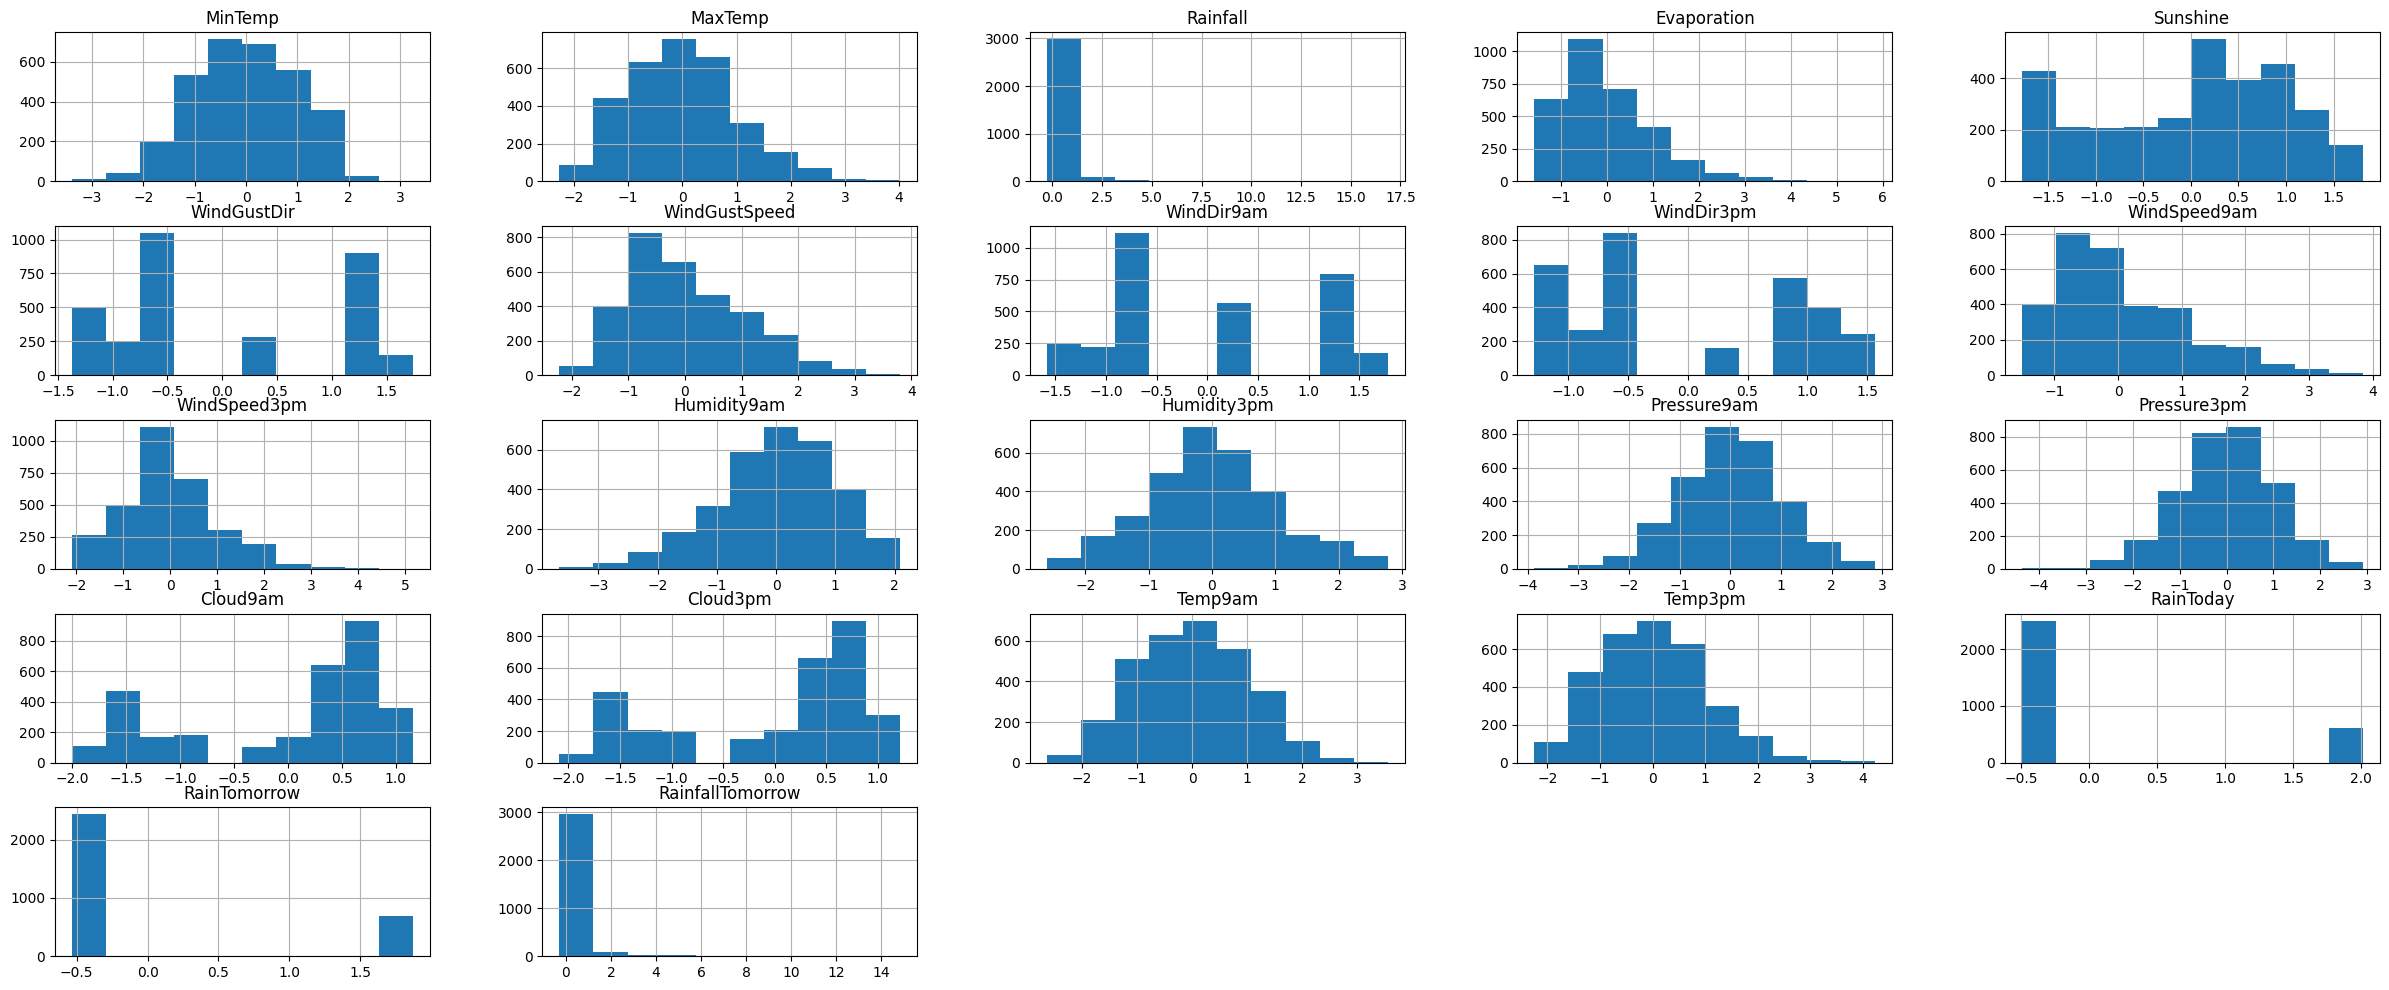

In [33]:
#@title Histogramas con las variables estandarizadas
df_std.hist(figsize=(30,12))
plt.show()

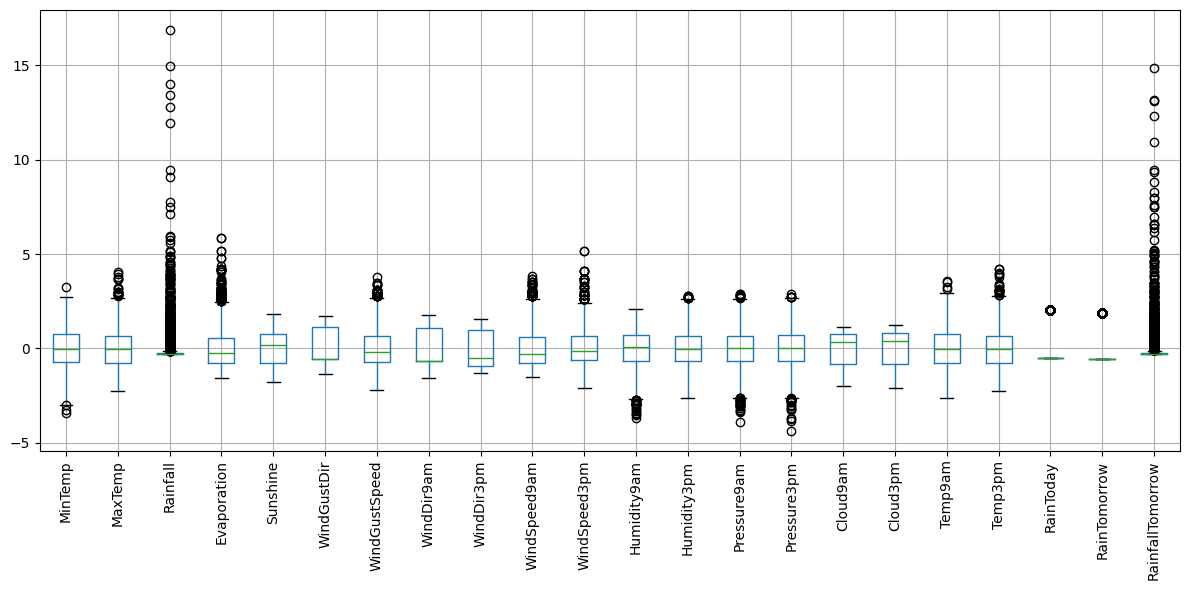

In [34]:
# Boxplot de las variables estandarizadas
plt.figure(figsize=(12, 6))
df_std.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

In [35]:
df_std.describe().round(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,...,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.392,-2.272,-0.279,-1.568,-1.780,-1.372,-2.221,-1.583,-1.283,-1.510,...,-2.606,-3.869,-4.357,-2.000,-2.088,-2.641,-2.246,-0.496,-0.534,-0.294
25%,-0.735,-0.748,-0.279,-0.759,-0.785,-0.542,-0.714,-0.686,-0.903,-0.768,...,-0.654,-0.642,-0.643,-0.816,-0.847,-0.756,-0.748,-0.496,-0.534,-0.294
50%,-0.010,-0.052,-0.279,-0.261,0.211,-0.542,-0.211,-0.686,-0.523,-0.274,...,-0.004,0.004,0.015,0.368,0.393,-0.006,-0.051,-0.496,-0.534,-0.294
75%,0.774,0.640,-0.222,0.548,0.787,1.117,0.668,1.107,0.999,0.632,...,0.647,0.669,0.688,0.763,0.807,0.745,0.663,-0.496,-0.534,-0.217
max,3.248,4.025,16.866,5.837,1.808,1.740,3.807,1.780,1.569,3.844,...,2.776,2.860,2.902,1.157,1.220,3.563,4.234,2.015,1.872,14.856


# Detección y filtrado de Outliers

In [36]:
df_out = df_std.drop(['RainTomorrow'], axis=1)
target = df['RainTomorrow']

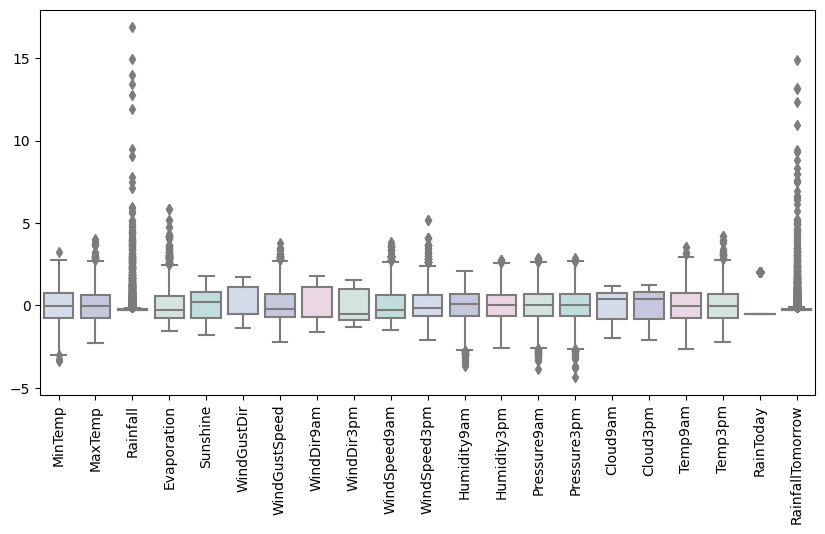

In [37]:
# Detección de outliers
# Boxplot con variables escaladas
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(10,5))
sns.boxplot(data = df_out,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [38]:
# Eliminación de outliers
# Datos completos
df_out["RainTomorrow"] = target

#Dropping with outlier
df_out = df_out[(df_out["MinTemp"]<2.3)&(df_out["MinTemp"]>-2.3)]
df_out = df_out[(df_out["MaxTemp"]<2.3)&(df_out["MaxTemp"]>-2)]
df_out = df_out[(df_out["Rainfall"]<2)]  # <<< ACOTAR >>>
df_out = df_out[(df_out["Evaporation"]<2.1)]
df_out = df_out[(df_out["Sunshine"]<2.1)]
df_out = df_out[(df_out["WindGustSpeed"]<2)&(df_out["WindGustSpeed"]>-4)]
df_out = df_out[(df_out["WindSpeed9am"]<1.9)]
df_out = df_out[(df_out["WindSpeed3pm"]<2)]
df_out = df_out[(df_out["Humidity9am"]>-2.4)]
df_out = df_out[(df_out["Humidity3pm"]>-2.2)&(df_out["Humidity3pm"]<2)]
df_out = df_out[(df_out["Pressure9am"]< 2)&(df_out["Pressure9am"]>-2.1)]
df_out = df_out[(df_out["Pressure3pm"]< 2)&(df_out["Pressure3pm"]>-2.1)]
df_out = df_out[(df_out["Cloud9am"]<1.8)]
df_out = df_out[(df_out["Cloud3pm"]<2)]
df_out = df_out[(df_out["Temp9am"]<2.3)&(df_out["Temp9am"]>-2)]
df_out = df_out[(df_out["Temp3pm"]<2.3)&(df_out["Temp3pm"]>-2)]
df_out = df_out[(df_out["RainfallTomorrow"]<2)]  # <<< ACOTAR >>>

df_out.shape

(2292, 22)

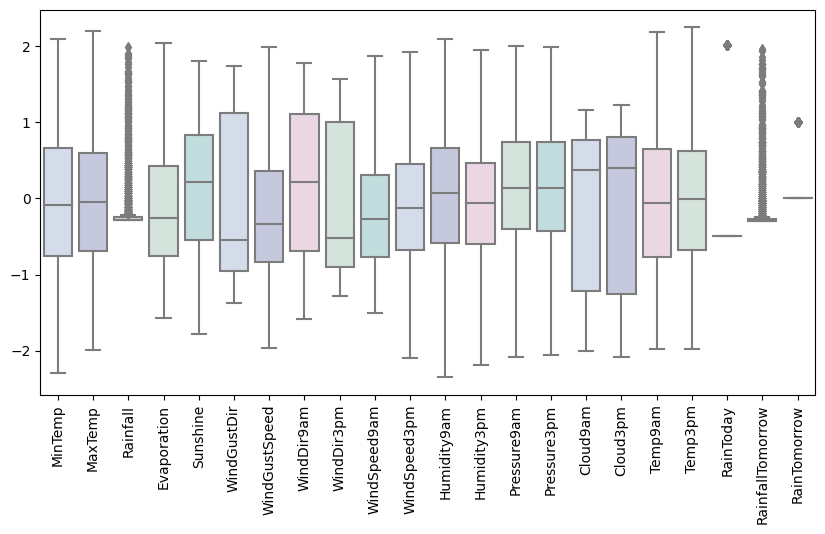

In [39]:
# Boxplot con variables escaladas sin outliers
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(10,5))
sns.boxplot(data = df_out,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Análisis de las distribuciones

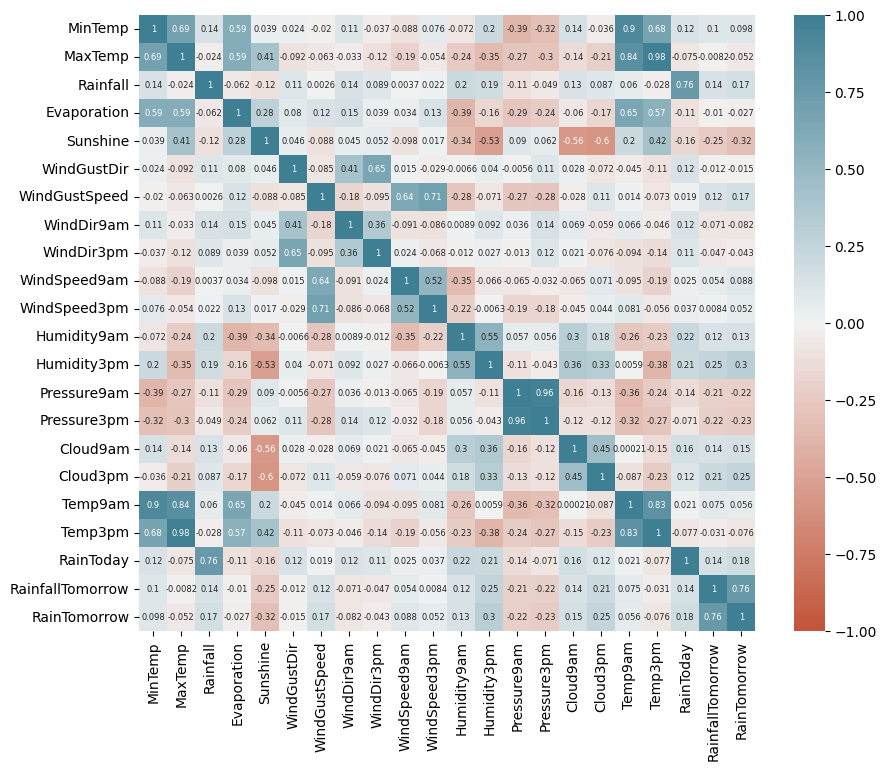

In [40]:
#@title Matriz de Correlación
corr = df_out.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

In [41]:
columnas = [col for col in df_out.columns if ((col != 'RainTomorrow') & (col != 'RainfallTomorrow'))]

<Figure size 1200x800 with 0 Axes>

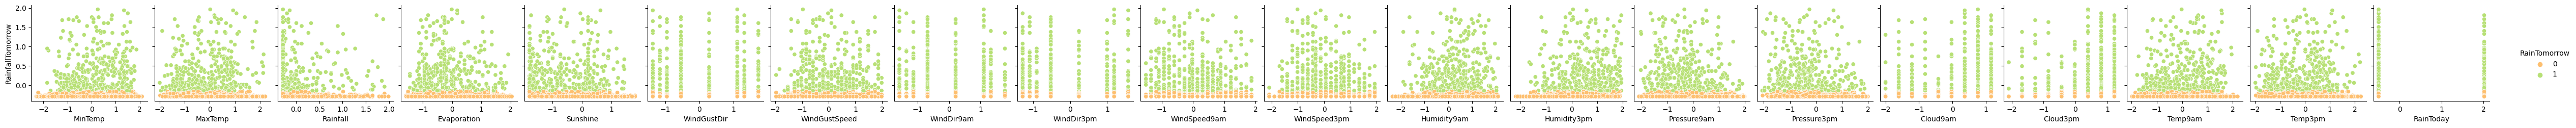

In [42]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_out, hue='RainTomorrow',x_vars=columnas,y_vars='RainfallTomorrow', palette='RdYlGn')
plt.show()

<Figure size 1200x800 with 0 Axes>

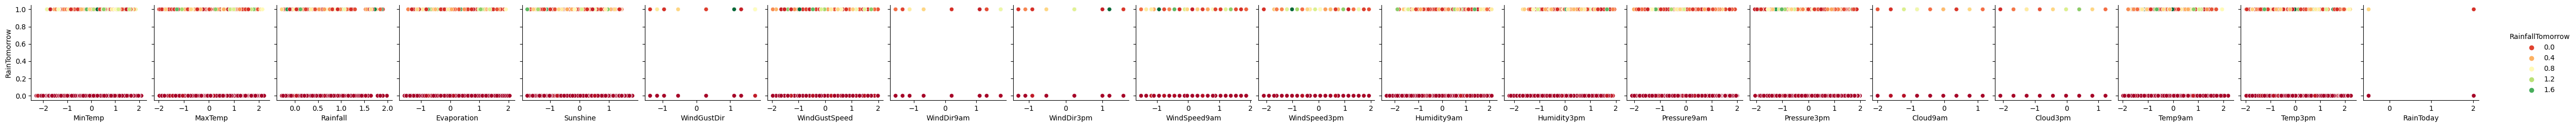

In [43]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_out, hue='RainfallTomorrow',x_vars=columnas,y_vars='RainTomorrow', palette='RdYlGn')
plt.show()

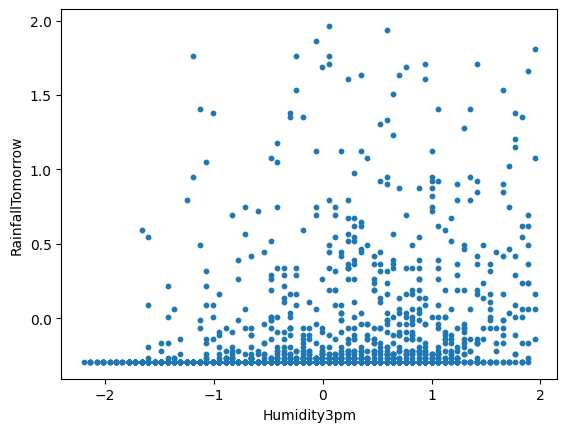

<Figure size 300x200 with 0 Axes>

In [44]:
# Relación entre la Humedad a las 3pm y la cantidad de lluvia de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_out['Humidity3pm'], df_out['RainfallTomorrow'], s= 10)
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('RainfallTomorrow')
plt.show()

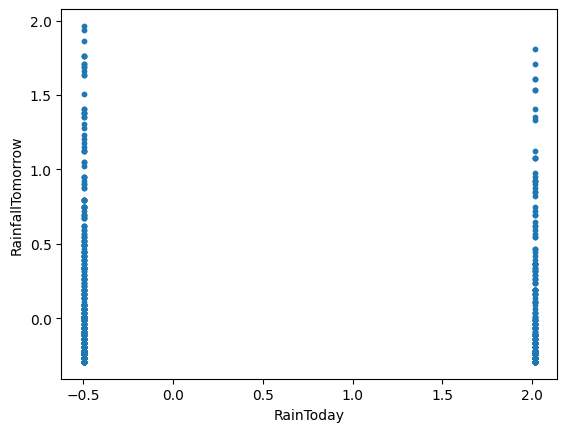

<Figure size 300x200 with 0 Axes>

In [45]:
# Relación entre la lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_out['RainToday'], df_out['RainfallTomorrow'], s= 10)
ax.set_xlabel('RainToday')
ax.set_ylabel('RainfallTomorrow')
plt.show()

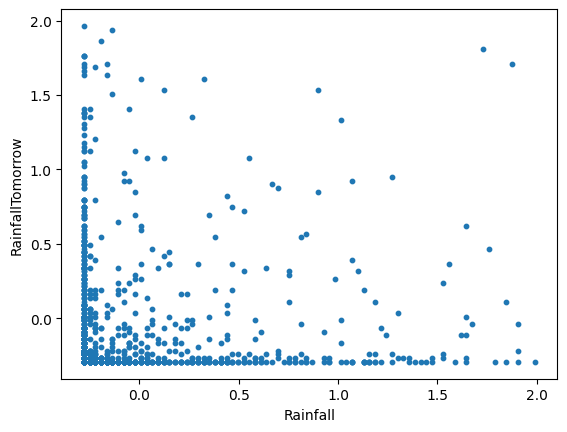

<Figure size 300x200 with 0 Axes>

In [46]:
# Relación entre la cantidad de lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_out['Rainfall'], df_out['RainfallTomorrow'], s= 10)
ax.set_xlabel('Rainfall')
ax.set_ylabel('RainfallTomorrow')
plt.show()

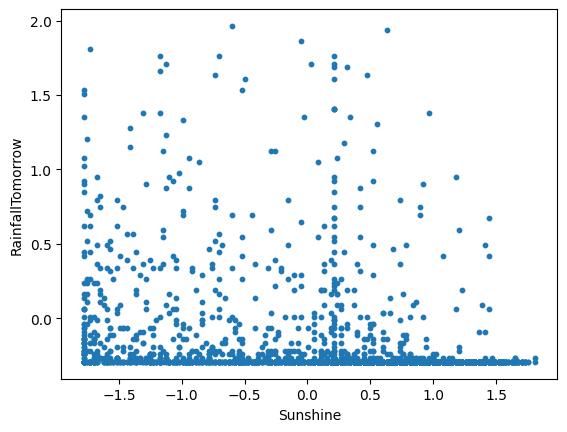

<Figure size 300x200 with 0 Axes>

In [47]:
# Relación entre la cantidad de lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_out['Sunshine'], df_out['RainfallTomorrow'], s= 10)
ax.set_xlabel('Sunshine')
ax.set_ylabel('RainfallTomorrow')
plt.show()

# Regresión Lineal

NOTA: Las variables a predecir, según la consigna, son "RainTomorrow" (categórica) y "RainfallTomorrow" (continua). Analizando los coeficientes de correlación entre esas variables y el resto (se descartan las que corresponden al día siguiente pues no admiten la posibilidad de predecir), las candidatas a ser elegidas para predecirlas son las siguientes.

* RainfallTomorrow: Humidity3pm (0,25) - Cloud3pm (0.21) - Rainfall (0,14) - Sunshine (-0,25)

* RainTomorrow: Humidity3pm (0,30) - Cloud3pm (0.25) - Rainfall (0,17) - Sunshine (-0,32)


**REGRESIÓN LINEAL:** Comenzamos con las variables "Humidity3pm", "Cloud3pm" y "Rainfall" para analizar su relación con la variable continua a predecir "RainfallTomorrow".

## Variable a predecir: RainfallTomorrow

### Relación "Humidity3pm" con "RainfallTomorrow"

Error cuadrático medio (MSE): 0.11
Coeficiente de determinación (R^2): 0.06


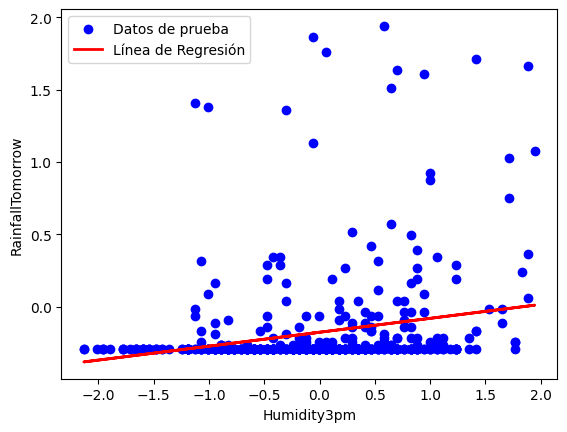

In [48]:
#@title Humidity3pm
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Humidity3pm']]
y = df_out['RainfallTomorrow']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Humidity3pm')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

### Relación "Cloud3pm" con "RainfallTomorrow"

Error cuadrático medio (MSE): 0.11
Coeficiente de determinación (R^2): 0.04


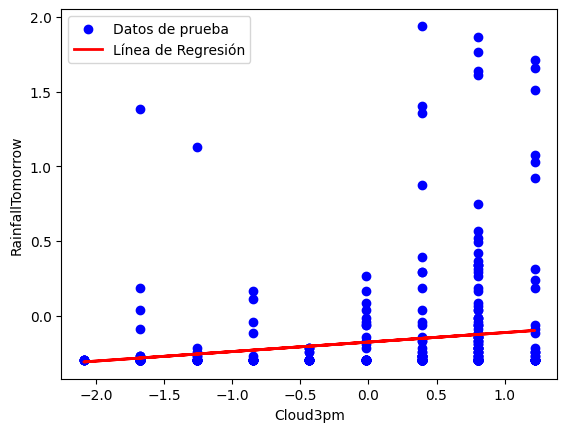

In [49]:
#@title Cloud3pm
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Cloud3pm']]
y = df_out['RainfallTomorrow']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Cloud3pm')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

### Relación "Rainfall" con "RainfallTomorrow"

Error cuadrático medio (MSE): 0.12
Coeficiente de determinación (R^2): -0.02


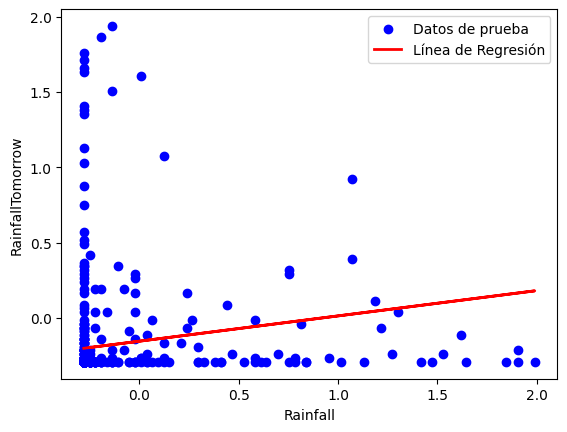

In [50]:
#@title Rainfall
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Rainfall']]
y = df_out['RainfallTomorrow']

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Rainfall')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

# Regresión Lineal con Gradiente Descendiente

In [51]:
#@title Gradiente Descendiente
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Humidity3pm']]
y = df_out['RainfallTomorrow']

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características para el gradiente descendiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo
model_sgd = SGDRegressor(max_iter=10000, random_state=42)

# Entrenamiento del modelo (Train)
model_sgd.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred_sgd = model_sgd.predict(X_test_scaled)

# Métricas del modelo
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Outputs
print('Resultados con Gradiente Descendiente:')
print(f'Error cuadrático medio (MSE): {mse_sgd:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_sgd:.2f}')


Resultados con Gradiente Descendiente:
Error cuadrático medio (MSE): 0.11
Coeficiente de determinación (R^2): 0.06


# Regularización Lasso, Ridge, ElasticNet

In [52]:
#@title Lasso, Ridge, ElasticNet
# Creación de los modelos (Lasso, Ridge, Elastic Net)
model_lasso = Lasso(alpha=0.1) # 0,01
model_ridge = Ridge(alpha=0.1) # 1.0
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5) #0.01 - 0.5

# Entrenamiento de los modelos (Train)
model_lasso.fit(X_train_scaled, y_train)
model_ridge.fit(X_train_scaled, y_train)
model_elastic.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_elastic = model_elastic.predict(X_test_scaled)

# Métricas del modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Outputs
print('Resultados con Regularización (Lasso):')
print(f'Error cuadrático medio (MSE): {mse_lasso:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_lasso:.2f}')
print("----------")
print('Resultados con Regularización (Ridge):')
print(f'Error cuadrático medio (MSE): {mse_ridge:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_ridge:.2f}')
print("----------")
print('Resultados con Regularización (Elastic Net):')
print(f'Error cuadrático medio (MSE): {mse_elastic:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_elastic:.2f}')


Resultados con Regularización (Lasso):
Error cuadrático medio (MSE): 0.12
Coeficiente de determinación (R^2): -0.00
----------
Resultados con Regularización (Ridge):
Error cuadrático medio (MSE): 0.11
Coeficiente de determinación (R^2): 0.06
----------
Resultados con Regularización (Elastic Net):
Error cuadrático medio (MSE): 0.12
Coeficiente de determinación (R^2): 0.03


#Regresión Logística

NOTA: Las variables a predecir, según la consigna, son "RainTomorrow" (categórica) y "RainfallTomorrow" (continua). Analizando los coeficientes de correlación entre esas variables y el resto (se descartan las que corresponden al día siguiente pues no admiten la posibilidad de predecir), las candidatas a ser elegidas para predecirlas son las siguientes.

* RainfallTomorrow: Humidity3pm (0,25) - Cloud3pm (0.21) - Rainfall (0,14) - Sunshine (-0,25)

* RainTomorrow: Humidity3pm (0,30) - Cloud3pm (0.25) - Rainfall (0,17) - Sunshine (-0,32)

**REGRESIÓN LOGÍSTICA:** Comenzamos con las variables "Humidity3pm", "Cloud3pm" y "Rainfall" para analizar su relación con la variable continua a predecir "RainTomorrow".

In [ ]:
df_out

## Variable explicativa: Humidity3pm

In [53]:
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Humidity3pm']]
y = df_out['RainTomorrow']

# Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [54]:
# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular el ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

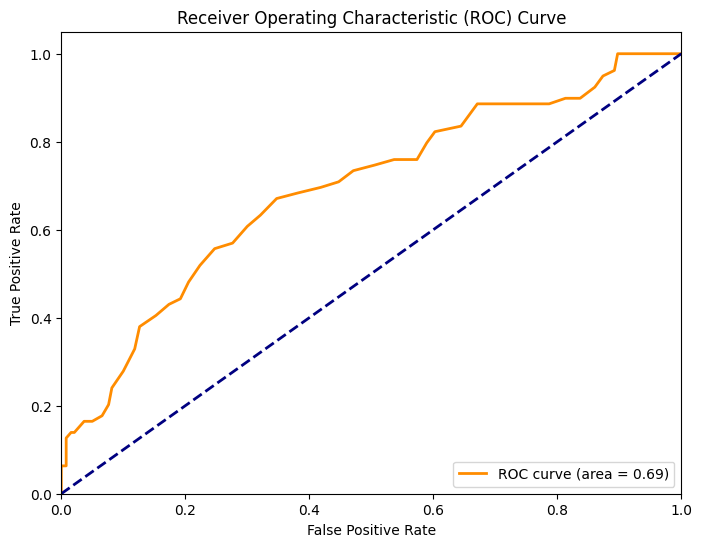

In [55]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

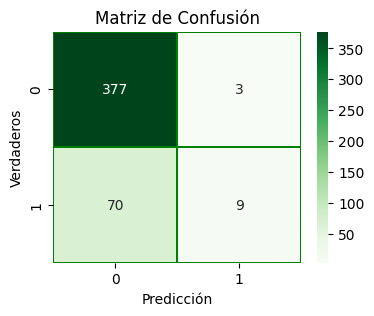

In [56]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", linewidths=0.1, linecolor='green', cbar=True)

# Añadir etiquetas a los ejes y al gráfico
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
#plt.xticks(np.arange(2) + 0.5, ['No', 'Sí'])
#plt.yticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.show()

In [57]:
# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.84
Precision: 0.75
Recall: 0.11
F1 Score: 0.20
ROC-AUC: 0.69


NOTA: Se observa que una sola característica es deficiente para explicar/predecir el comportamiento del dia siguiente. Suponemos que las variables explican mejor el fenómeno cuando actúan en conjunto.

## Variables explicativas combinadas

In [58]:
# Selecciona las características (X) y la variable objetivo (y)
X = df_out[['Humidity3pm', 'Cloud3pm', 'Rainfall', 'Sunshine']]
y = df_out['RainTomorrow']

# Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [59]:
# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular el ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

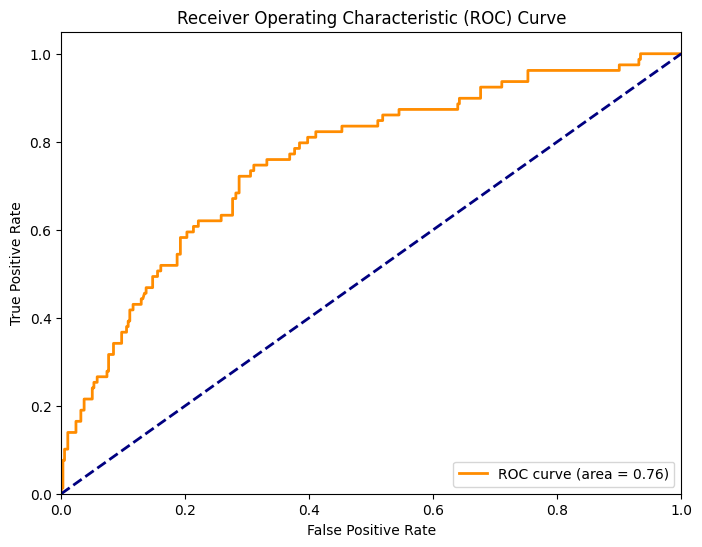

In [60]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

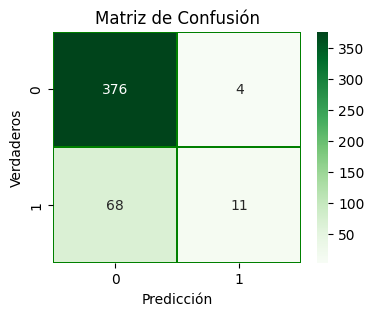

In [61]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", linewidths=0.1, linecolor='green', cbar=True)
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
#plt.xticks(np.arange(2) + 0.5, ['No', 'Sí'])
#plt.yticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.show()

In [62]:
# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.84
Precision: 0.73
Recall: 0.14
F1 Score: 0.23
ROC-AUC: 0.76


NOTA: No se observan mejoras significativas en las métricas al combinar las variables que tienen más correlación con la variable objetivo. Probablemente sea necesario aplicar más técnicas de ajustes a los datos y el modelo.

# Pruebas

## PCA (A modo de Pruebas)

In [ ]:
# Obtener todas las componentes principales
#pca = PCA(n_components = df_std.shape[1])
pca = PCA(n_components = 7)

pca_features = pca.fit_transform(df_out)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['RainfallTomorrow'] = df['RainfallTomorrow']

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,RainfallTomorrow
0,-0.145896,-1.319289,-1.372393,0.710370,0.889474,-1.250843,-0.196554,0.0
1,0.070671,1.113063,-1.204282,-1.880073,-0.662616,-0.146936,0.969995,2.0
2,1.447775,-1.099976,-0.130104,0.887940,0.323520,-1.875176,-1.494961,0.0
3,-2.197238,0.651668,-2.358741,1.482044,-0.664396,1.073424,-0.968689,0.2
4,0.282173,-2.134768,0.500681,-1.519012,-0.126036,1.337874,1.598668,0.0
...,...,...,...,...,...,...,...,...
2678,-1.587335,1.502624,0.540432,-1.081525,0.058625,-0.698768,0.145130,0.0
2679,-2.635750,-1.044637,-0.321567,-2.449215,-0.899470,-0.324044,-0.752695,5.8
2680,-2.808747,-2.158650,-0.552033,-1.919435,0.212568,-0.624389,-0.274992,1.8
2681,-2.120076,-1.896869,1.179111,-1.610874,0.167870,0.118818,0.012669,0.0


## Modelo de Predicción (A modo de Pruebas)

In [131]:
df_out.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainfallTomorrow', 'RainTomorrow'],
      dtype='object')

In [168]:
# Train/Test
X = df_out[['Humidity3pm']]
# x = df_out.drop(['RainTomorrow'], axis=1)
# x = df_std.drop(['RainTomorrow'], axis=1)
y = df_out['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y_train

In [ ]:
x_train

In [173]:
# Fit/Transform
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [174]:
# RandomForest
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))

0.987783595113438


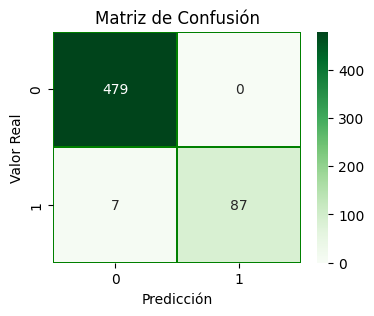

Precisión del modelo: 0.988


In [175]:
# Entrenar el modelo
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
pred = model.predict(x_test)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", linewidths=0.1, linecolor='green', cbar=True)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, pred)
print(f'Precisión del modelo: {accuracy:.3f}')


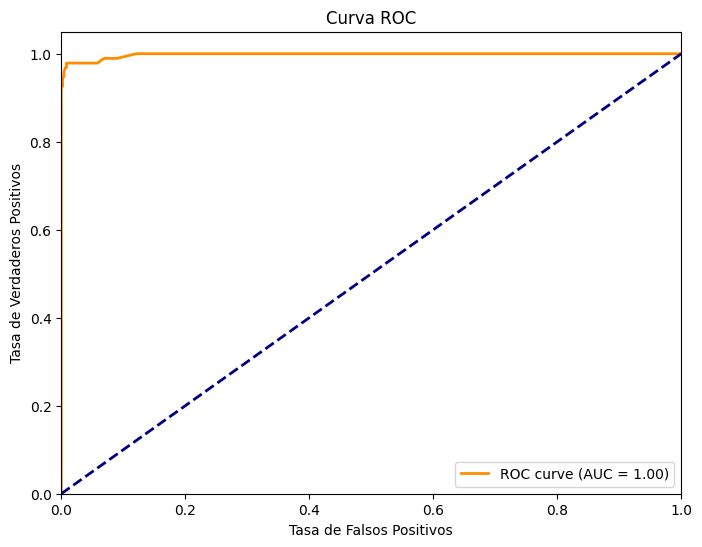

In [176]:
# Curva ROC
# Calcular las puntuaciones de probabilidad para las clases positivas
probs = model.predict_proba(x_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


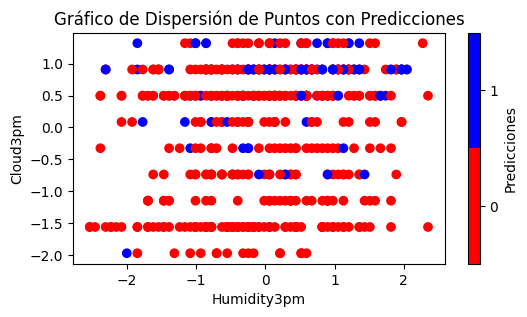

In [141]:
# Suponiendo que 'x_test' tiene al menos dos características
feature1_index = 11  # Índice de la primera característica
feature2_index = 16  # Índice de la segunda característica

# Crear un mapa de colores personalizado para la leyenda
cmap = ListedColormap(['red', 'blue'])  # Rojo (0) y Verde (1)

plt.figure(figsize=(6, 3))
scatter = plt.scatter(x_test[:, feature1_index], x_test[:, feature2_index], c=pred, cmap=cmap)
plt.xlabel('Humidity3pm')
plt.ylabel('Cloud3pm')
plt.title('Gráfico de Dispersión de Puntos con Predicciones')

# Agregar una barra de colores personalizada para la leyenda
plt.colorbar(scatter, ticks=[0, 1], label='Predicciones', boundaries=[-0.5, 0.5, 1.5])

plt.show()
